In [48]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [49]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Github\VarianceArithmetic\IPyNb


In [66]:
dfN = pd.read_csv("../Python/Output/NormalLeakage.txt", sep='\t')
dfN.head()

,Samples,Kappa,Count,Mean,Deviation,Range
0,0,1.00,0,0.317311,0.0,1.00
1,0,1.25,0,0.211300,0.0,1.25
2,0,1.50,0,0.133614,0.0,1.50
3,0,1.75,0,0.080118,0.0,1.75
4,0,2.00,0,0.045500,0.0,2.00


<AxesSubplot:title={'center':'Gaussian Distribution'}, xlabel='Measuring Bound Range $\\kappa_s$', ylabel='Measured Bounding Leakage $\\epsilon(2, \\kappa)$'>

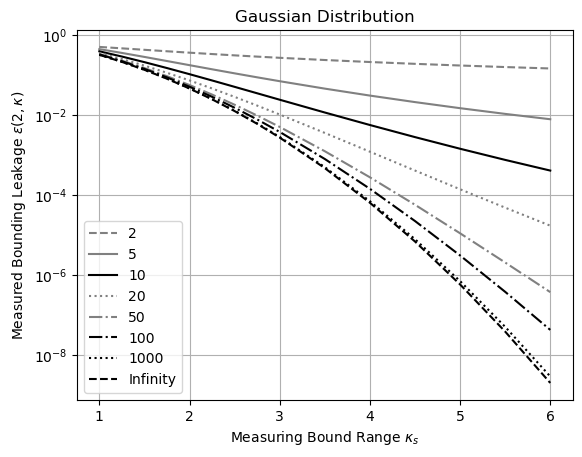

In [67]:
ax = dfN[dfN['Samples'] == 2].plot(x='Kappa', y='Mean', label=2, color='gray', style='--')
dfN[dfN['Samples'] == 5].plot(x='Kappa', y='Mean', label='5', color='gray', style='-', ax=ax)
dfN[dfN['Samples'] == 10].plot(x='Kappa', y='Mean', label='10', color='black', style='-', ax=ax)
dfN[dfN['Samples'] == 20].plot(x='Kappa', y='Mean', label='20', color='gray', style=':', ax=ax)
dfN[dfN['Samples'] == 50].plot(x='Kappa', y='Mean', label='50', color='gray', style='-.', ax=ax)
dfN[dfN['Samples'] == 100].plot(x='Kappa', y='Mean', label='100', color='black', style='-.', ax=ax)
dfN[dfN['Samples'] == 1000].plot(x='Kappa', y='Mean', label='1000', color='black', style=':', ax=ax)
dfN[dfN['Samples'] == 0].plot(x='Kappa', y='Mean', label='Infinity', color='black', style='--', ax=ax, grid=True, logy=True, 
                title='Gaussian Distribution', xlabel=r'Measuring Bound Range $\kappa_s$', 
                              ylabel=r'Measured Bounding Leakage $\epsilon(2, \kappa)$')

<AxesSubplot:title={'center':'Gaussian Distribution'}, xlabel='Measuring Bound Range $\\kappa_s$', ylabel='Measured Bound Range $\\kappa$'>

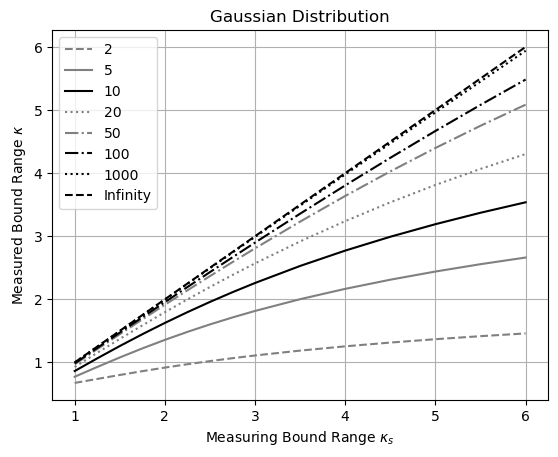

In [68]:
ax = dfN[dfN['Samples'] == 2].plot(x='Kappa', y='Range', label=2, color='gray', style='--')
dfN[dfN['Samples'] == 5].plot(x='Kappa', y='Range', label='5', color='gray', style='-', ax=ax)
dfN[dfN['Samples'] == 10].plot(x='Kappa', y='Range', label='10', color='black', style='-', ax=ax)
dfN[dfN['Samples'] == 20].plot(x='Kappa', y='Range', label='20', color='gray', style=':', ax=ax)
dfN[dfN['Samples'] == 50].plot(x='Kappa', y='Range', label='50', color='gray', style='-.', ax=ax)
dfN[dfN['Samples'] == 100].plot(x='Kappa', y='Range', label='100', color='black', style='-.', ax=ax)
dfN[dfN['Samples'] == 1000].plot(x='Kappa', y='Range', label='1000', color='black', style=':', ax=ax)
dfN[dfN['Samples'] == 0].plot(x='Kappa', y='Range', label='Infinity', color='black', style='--', ax=ax, grid=True, 
                              title='Gaussian Distribution', xlabel=r'Measuring Bound Range $\kappa_s$', 
                              ylabel=r'Measured Bound Range $\kappa$')

In [107]:
def plotLeakage(sRange:tuple[int]=(4,5,6), sLineStyle:tuple[str]=('--','-','-.'), 
                xlim=(1, 10**5)):
    fig, ax = plt.subplots()
    ax.set_xlabel(r'Sample Count $N$')
    if xlim:
        ax.set_xlim(*xlim)
    ax.set_ylabel(r'Linear Leakage $\omega(\kappa, N) = 1 - \zeta(2, \kappa)$')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title('Gaussian Distribution')
    plt.grid(True)

    ax2 = ax.twinx()
    ax2.set_ylabel(r'Measured bounding Range $\kappa$')
    
    for rng,ls in zip(sRange,sLineStyle):
        dfPlot = dfN[(dfN['Kappa'] == rng) & (dfN['Samples'] > 0)]
        ax.plot(dfPlot['Samples'], dfPlot['Mean'], c='black', ls=ls, 
                label=r'Uniform' if rng is None else f'Leakage $\kappa_s$={rng}')
        ax2.plot(dfPlot['Samples'], dfPlot['Range'], c='gray', ls=ls, 
                label=r'Uniform' if rng is None else f'Measured $\kappa$ $\kappa_s$={rng}')
        
    ax.legend(bbox_to_anchor=(1.45, 1.0))
    ax2.legend(bbox_to_anchor=(1.45, 0.3))


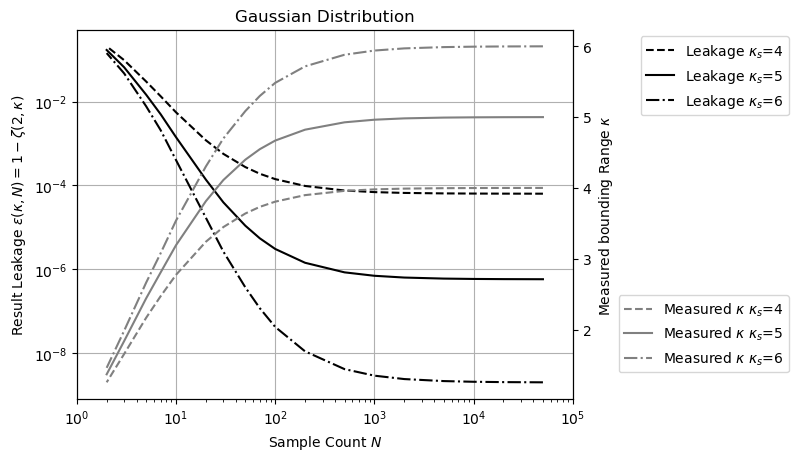

In [70]:
plotLeakage()

In [105]:
dfN = pd.read_csv("../Python/Output/NormalSamples.txt", sep='\t')
dfN.head()

,Samples,Kappa,Count,Mean,Deviation,Range
0,0,1.00,0,0.801252,0.0,1.00
1,0,1.25,0,0.667922,0.0,1.25
2,0,1.50,0,0.522167,0.0,1.50
3,0,1.75,0,0.382089,0.0,1.75
4,0,2.00,0,0.261464,0.0,2.00


<AxesSubplot:title={'center':'Gaussian Distribution'}, xlabel='Measuring Bound Range $\\kappa_s$', ylabel='Measured Linear Leakage $\\omega(\\kappa, N) = 1 - \\zeta(2, \\kappa)$'>

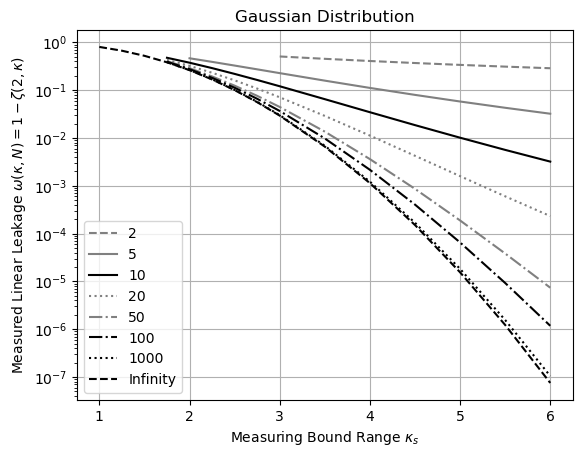

In [106]:
ax = dfN[dfN['Samples'] == 2].plot(x='Kappa', y='Mean', label=2, color='gray', style='--')
dfN[dfN['Samples'] == 5].plot(x='Kappa', y='Mean', label='5', color='gray', style='-', ax=ax)
dfN[dfN['Samples'] == 10].plot(x='Kappa', y='Mean', label='10', color='black', style='-', ax=ax)
dfN[dfN['Samples'] == 20].plot(x='Kappa', y='Mean', label='20', color='gray', style=':', ax=ax)
dfN[dfN['Samples'] == 50].plot(x='Kappa', y='Mean', label='50', color='gray', style='-.', ax=ax)
dfN[dfN['Samples'] == 100].plot(x='Kappa', y='Mean', label='100', color='black', style='-.', ax=ax)
dfN[dfN['Samples'] == 1000].plot(x='Kappa', y='Mean', label='1000', color='black', style=':', ax=ax)
dfN[dfN['Samples'] == 0].plot(x='Kappa', y='Mean', label='Infinity', color='black', style='--', ax=ax, grid=True, logy=True, 
                title='Gaussian Distribution', xlabel=r'Measuring Bound Range $\kappa_s$', 
                              ylabel=r'Measured Linear Leakage $\omega(\kappa, N) = 1 - \zeta(2, \kappa)$')

<AxesSubplot:title={'center':'Gaussian Distribution'}, xlabel='Measuring bound Range $\\kappa_s$', ylabel='Measured Bound Range $\\kappa$'>

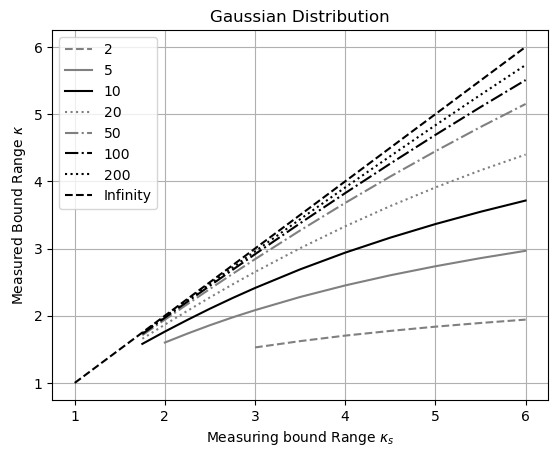

In [103]:
ax = dfN[dfN['Samples'] == 2].plot(x='Kappa', y='Range', label=2, color='gray', style='--')
dfN[dfN['Samples'] == 5].plot(x='Kappa', y='Range', label='5', color='gray', style='-', ax=ax)
dfN[dfN['Samples'] == 10].plot(x='Kappa', y='Range', label='10', color='black', style='-', ax=ax)
dfN[dfN['Samples'] == 20].plot(x='Kappa', y='Range', label='20', color='gray', style=':', ax=ax)
dfN[dfN['Samples'] == 50].plot(x='Kappa', y='Range', label='50', color='gray', style='-.', ax=ax)
dfN[dfN['Samples'] == 100].plot(x='Kappa', y='Range', label='100', color='black', style='-.', ax=ax)
dfN[dfN['Samples'] == 200].plot(x='Kappa', y='Range', label='200', color='black', style=':', ax=ax)
dfN[dfN['Samples'] == 0].plot(x='Kappa', y='Range', label='Infinity', color='black', style='--', ax=ax, grid=True, 
                              title='Gaussian Distribution', xlabel=r'Measuring bound Range $\kappa_s$', 
                              ylabel=r'Measured Bound Range $\kappa$')

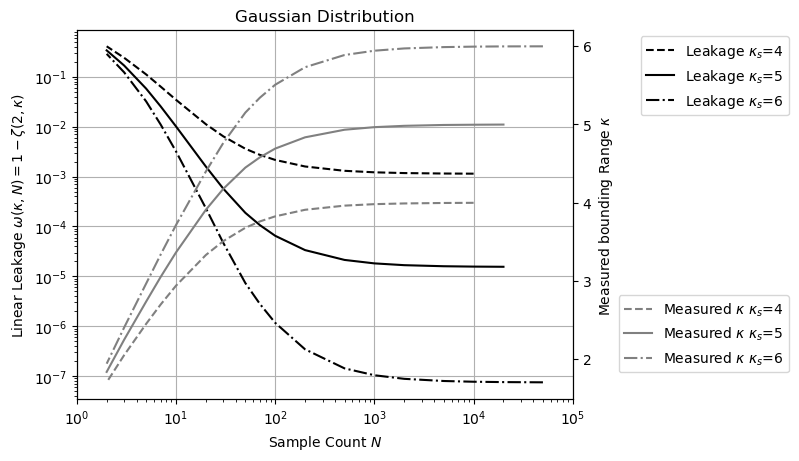

In [108]:
plotLeakage()

In [109]:
def plotFunc(dfF, kappa, title, 
             value:str='Variance Leak', ylabel=r'Ideal Leakage $\varepsilon = 1 - \delta^2 f/\widehat{\delta^2} f$', 
             xlim=None, ylim=None):
    fig, ax = plt.subplots()
    ax.set_title(title)
    if kappa:
        ax.set_xscale('log')
        ax.set_xlabel('Samples N')
    else:
        ax.set_xlabel('Measuring Bound Range ${\kappa_s}$')
    ax.set_yscale('log')
    if xlim:
        ax.set_xlim(*xlim)
    if ylim:
        ax.set_ylim(*ylim)
    ax.set_ylabel(ylabel)
    plt.grid(True)
    for func, style in (('x', 'k:'), ('sin(x)', 'kx'), ('exp(x)', 'k+'), ('log(x)', 'k.')):
        if kappa:
            dfPlot = dfF[(dfF['Function'] == func) & (dfF['Samples'] > 0) & (dfF['Kappa'] == kappa)]
        else:
             dfPlot = dfF[(dfF['Function'] == func) & (dfF['Samples'] == 0)]
        ax.plot(dfPlot['Samples'] if kappa else dfPlot['Kappa'], dfPlot[value], style, label=func)
    for func, style in (('x^2', '+'), ('x^0.5', '.'), ('x^-1', ':'), ('x^-2', 'x')):
        if kappa:
            dfPlot = dfF[(dfF['Function'] == func) & (dfF['Samples'] > 0) & (dfF['Kappa'] == kappa)]
        else:
             dfPlot = dfF[(dfF['Function'] == func) & (dfF['Samples'] == 0)]
        ax.plot(dfPlot['Samples'] if kappa else dfPlot['Kappa'], dfPlot[value], style, color='gray', label=func)
    ax.legend(bbox_to_anchor=(1, 1))
 

In [110]:
dfN = pd.read_csv("../Python/Output/NormalBounding.txt", sep='\t')
dfN.head()

,Kappa,Samples,Bounding,Leakage,Function,Stable Variance,Output Variance,Variance Ratio,Variance Leak
0,2.0,0,2.000,0.045500,x,0.01,0.007385,0.738536,0.261464
1,2.0,2000,1.998,0.045717,x,0.01,0.007377,0.737671,0.262329
2,2.0,1000,1.997,0.045825,x,0.01,0.007372,0.737238,0.262762
3,2.0,500,1.993,0.046261,x,0.01,0.007355,0.735502,0.264498
4,2.0,200,1.984,0.047256,x,0.01,0.007316,0.731570,0.268430


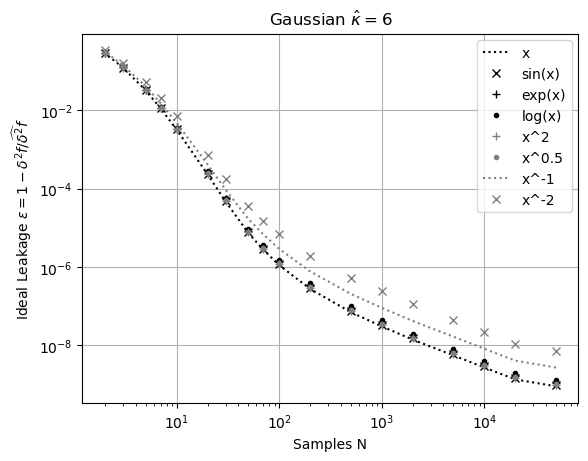

In [111]:
plotFunc(dfN, kappa=6, title=r'Gaussian $\hat{\kappa}=6$')

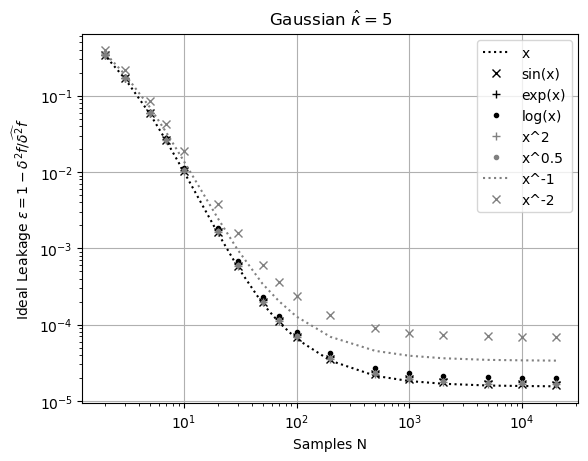

In [112]:
plotFunc(dfN, kappa=5, title=r'Gaussian $\hat{\kappa}=5$')

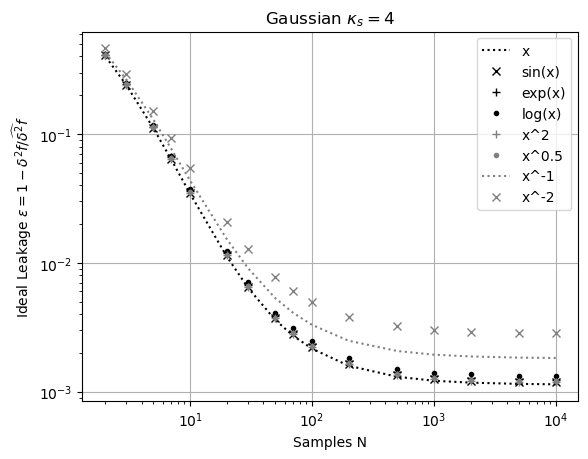

In [113]:
plotFunc(dfN, kappa=4, title=r'Gaussian $\kappa_s=4$')

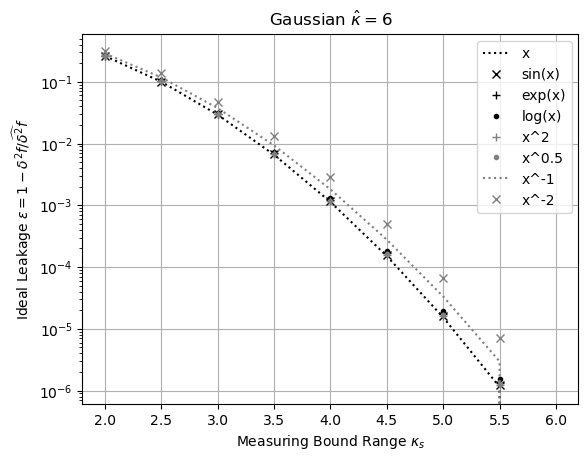

In [114]:
plotFunc(dfN, kappa=0, title=r'Gaussian $\hat{\kappa}=6$')